# Preprocessing HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from scipy.spatial import distance

In [3]:
colorblind_palette = ['#5ab4ac', '#b2182b', '#2d004b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load datasets

In [4]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/preprocessing/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [19]:
dataset = pd.read_csv(f'{FILE_PATH}/01_pointing_task.csv', index_col=[0])
demographics = pd.read_csv(f'{FILE_PATH}/00_demographics.csv', index_col=[0])
all_buildings = pd.read_csv(f'{FILE_PATH}/02_all_buildings_list.csv', index_col=[0])
avatar_info = pd.read_csv(f'{FILE_PATH}/03_avatar_info_list.csv', index_col=[0])
starting_locations = pd.read_csv(f'{FILE_PATH}/05_starting_locations_info.csv', index_col=0)
print('Done!')

Done!


### Glimpse at the data

In [5]:
dataset.head()

,SubjectID,IQR,IQRlimit,IQRlimit2,Unnamed: 0,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,...,radians,degrees,atanPointer,atanBuild-Part,atanSubs,rad2degree,AbsolutError,Flag,Flag2,Removefirst
0,365,63.921884,95.882826,191.765652,0,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,...,0.468390,26.836743,1.626782,1.358059,0.268723,15.396716,15.396716,True,True,False
1,365,63.921884,95.882826,191.765652,2,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,...,0.420196,24.075485,1.497808,1.603186,-0.105378,-6.037733,6.037733,True,True,True
2,365,63.921884,95.882826,191.765652,4,38.849380,53.547638,38.471634,53.516281,-0.993265,...,0.929789,53.272987,-3.028520,-3.139266,0.110746,6.345290,6.345290,True,True,True
3,365,63.921884,95.882826,191.765652,6,38.880081,53.564148,38.700195,53.581047,-0.995648,...,0.928970,53.226082,-3.075803,-3.139119,0.063316,3.627752,3.627752,True,True,True
4,365,63.921884,95.882826,191.765652,8,110.754181,196.522675,110.428146,196.550751,-0.941145,...,0.391448,22.428323,-2.811994,-2.478370,-0.333624,-19.115237,19.115237,True,True,True


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7708 entries, 0 to 7727
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SubjectID                         7708 non-null   int64  
 1   IQR                               7708 non-null   float64
 2   IQRlimit                          7708 non-null   float64
 3   IQRlimit2                         7708 non-null   float64
 4   Unnamed: 0                        7708 non-null   int64  
 5   ParticipantPosition_x             7708 non-null   float64
 6   ParticipantPosition_z             7708 non-null   float64
 7   PointerPosition_x                 7708 non-null   float64
 8   PointerPosition_z                 7708 non-null   float64
 9   PointerDirection_x                7708 non-null   float64
 10  PointerDirection_z                7708 non-null   float64
 11  BuildingCenterWorld_z             7708 non-null   float64
 12  Buildi

In [7]:
dataset.describe()

,SubjectID,IQR,IQRlimit,IQRlimit2,Unnamed: 0,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,...,Dot_Pointer-Building-Participant,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees,atanPointer,atanBuild-Part,atanSubs,rad2degree,AbsolutError
count,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,...,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000
mean,5702.099896,54.018505,81.027757,162.055514,7726.978204,-2.156487,14.231094,-2.166732,14.224584,-0.027117,...,50547.565723,209.116229,289.501605,0.750055,42.974977,-0.187648,-0.096779,-0.090869,-5.906966,48.078140
std,2787.888521,16.278439,24.417659,48.835317,4464.617631,174.454361,137.840143,174.350427,137.706472,0.718931,...,50722.379025,78.397299,139.738577,0.669483,38.358541,1.847733,1.824128,1.923185,65.109791,44.298692
min,365.000000,22.212112,33.318168,66.636336,0.000000,-326.978333,-191.062988,-327.328186,-191.198029,-0.999982,...,-35189.934288,40.304656,21.578343,0.000105,0.006036,-3.141554,-3.139266,-6.233997,-179.881808,0.009861
25%,3572.000000,43.714881,65.572322,131.144644,3857.500000,-114.503471,-139.386597,-114.761078,-139.170029,-0.761138,...,13254.605487,162.577715,181.585388,0.253689,14.535293,-1.887831,-1.724279,-0.779854,-40.591635,12.864763
50%,5741.000000,54.858665,82.287997,164.575994,7726.000000,2.233383,38.982082,1.905571,38.738976,-0.069765,...,40819.530906,210.879458,273.025892,0.543681,31.150621,-0.169594,-0.040375,-0.095356,-5.540527,33.697731
75%,8007.000000,66.803331,100.204996,200.409992,11596.500000,138.258377,140.314110,137.866268,139.838062,0.694270,...,75907.762967,253.412223,384.936761,1.047071,59.992741,1.324978,1.286146,0.477269,25.333990,71.548217
max,9601.000000,79.984012,119.976018,239.952035,15454.000000,367.005798,236.020691,366.908752,235.936188,0.999999,...,282142.996610,383.849659,738.776268,3.136992,179.736428,3.140580,3.139465,6.258436,179.983386,179.983386


In [20]:
demographics.head()

,language,ID,age,gender
0,English,365,37,female
1,German,3572,23,male
2,German,7264,23,male
3,German,8469,29,female
4,German,6642,19,female


In [21]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   language  23 non-null     object
 1   ID        23 non-null     int64 
 2   age       23 non-null     int64 
 3   gender    23 non-null     object
dtypes: int64(2), object(2)
memory usage: 920.0+ bytes


In [8]:
all_buildings.head()

,BuildingID,BuildingName,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
0,59,Crane_59,-318.127991,26.896717,-167.823914,-313.499451,1.614944,-150.514664,-313.499451,1.614944,...,1.20745,2.423655e-01,-7.277503e-09,9.701850e-01,5.915870e-08,1.000000e+00,-7.277503e-09,0.970185,-5.915870e-08,-0.242366
1,58,BasketballCourt_58,104.339996,-0.440584,-45.689999,104.339996,-3.070000,-45.689999,104.339996,-3.070000,...,1.00000,-6.614817e-01,0.000000e+00,7.499613e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.749961,0.000000e+00,0.661482
2,57,Construction_57,-71.695419,0.739893,-26.238297,-71.803406,0.551138,-26.717417,-0.028043,0.005596,...,1.00000,1.490116e-07,1.000000e+00,-1.639128e-07,7.768201e-01,-2.384186e-07,-6.297227e-01,0.629723,0.000000e+00,0.776820
3,48,TaskBuilding_48,-195.637009,7.350957,-130.434052,-195.637512,-0.000015,-130.434052,-195.637512,130.434067,...,1.00000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000
4,52,TaskBuilding_52,-247.185669,4.570368,54.489395,-247.203369,2.410477,54.642479,-247.203369,-54.642483,...,1.00000,1.147317e-01,-4.165431e-07,-9.933965e-01,2.397451e-08,1.000000e+00,-4.165431e-07,-0.993397,-2.397451e-08,-0.114732


In [9]:
all_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingID                       56 non-null     int64  
 1   BuildingName                     56 non-null     object 
 2   BuildingCenterWorld.x            56 non-null     float64
 3   BuildingCenterWorld.y            56 non-null     float64
 4   BuildingCenterWorld.z            56 non-null     float64
 5   BuildingPositionGlobal.x         56 non-null     float64
 6   BuildingPositionGlobal.y         56 non-null     float64
 7   BuildingPositionGlobal.z         56 non-null     float64
 8   BuildingPositionLocal.x          56 non-null     float64
 9   BuildingPositionLocal.y          56 non-null     float64
 10  BuildingPositionLocal.z          56 non-null     float64
 11  BuildingRotationGlobal.x         56 non-null     float64
 12  BuildingRotationGlobal.y

In [10]:
all_buildings.describe()

,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,BuildingPositionLocal.z,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,56.000000
mean,28.839286,8.897565,6.230483,8.850133,8.891293,-0.699142,9.432957,10.172996,-15.121614,-5.762569,...,1.003704,0.092599,7.142840e-02,0.099134,2.409818e-02,8.571428e-01,-1.916140e-02,0.124996,-3.602064e-08,-0.075923
std,16.827226,192.782942,5.453986,124.984650,192.946374,3.398881,124.649720,192.638739,121.578577,24.067370,...,0.027722,0.560289,3.745127e-01,0.734892,2.720723e-01,3.530940e-01,2.654545e-01,0.777820,1.314038e-07,0.625620
min,1.000000,-336.362793,-0.791109,-255.873932,-338.406921,-6.542114,-256.052216,-338.406921,-293.247589,-150.514664,...,1.000000,-0.950611,-1.000000e+00,-1.000000,-9.998724e-01,-2.384186e-07,-9.999999e-01,-1.000000,-4.172325e-07,-0.999872
25%,14.750000,-136.218853,4.085809,-66.197618,-136.462280,-2.367606,-66.331362,-136.462280,-102.433153,-2.426545,...,1.000000,-0.632546,-3.650081e-07,-0.743667,-8.064804e-08,1.000000e+00,-3.809883e-07,-0.746625,-1.117616e-07,-0.631021
50%,28.500000,1.375929,5.244463,9.003581,1.302004,-1.151408,9.077952,2.941159,-10.794964,-1.305926,...,1.000000,0.057366,-9.727868e-08,0.169295,4.079921e-08,1.000000e+00,-1.388518e-07,0.625363,-3.162905e-08,-0.150597
75%,42.250000,143.431297,7.395142,102.297266,146.388565,0.595204,102.433146,146.388565,55.490621,0.422222,...,1.000000,0.579345,0.000000e+00,0.762951,1.512802e-07,1.000000e+00,0.000000e+00,0.774274,6.304895e-08,0.648394
max,59.000000,401.768616,31.293985,288.053894,401.828735,18.361389,293.247559,401.828735,256.052246,18.361364,...,1.207450,0.940934,1.000000e+00,1.000000,9.893244e-01,1.000000e+00,9.417416e-01,1.000000,1.851118e-07,0.989324


In [11]:
avatar_info.head()

,AvatarID,PlaceName,AvatarName,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
51,1,S (pub),01_Cma,229.519257,-0.637397,128.086029,229.503265,-1.394489,128.085861,25.510000,...,1,0.00000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,0.00000
0,2,S (bookstore),02_Cma,-147.664993,3.072653,67.390167,-147.646744,2.345342,67.389999,-351.640015,...,1,0.00000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,0.00000
38,3,S (boulangerie),03_Cma,201.879623,-2.229652,216.528137,201.783264,-2.956963,216.535858,-2.210000,...,1,0.19951,0.000000,-0.979896,0.0,1.000000,0.000000,-0.979896,0.0,-0.19951
49,4,S (cars shop),04_Cma,-193.321976,2.821737,-13.343796,-190.609512,3.100000,-15.804230,-394.602783,...,1,0.00000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,0.00000
39,5,C (center),05_Cma,-65.779404,0.013390,-27.640793,-65.986740,-0.541489,-27.530014,-269.980011,...,1,0.00000,-0.013202,0.999913,0.0,0.999913,0.013202,1.000000,0.0,0.00000


In [12]:
avatar_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 51 to 47
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AvatarID                       56 non-null     int64  
 1   PlaceName                      56 non-null     object 
 2   AvatarName                     56 non-null     object 
 3   AvatarCenterWorld.x            56 non-null     float64
 4   AvatarCenterWorld.y            56 non-null     float64
 5   AvatarCenterWorld.z            56 non-null     float64
 6   AvatarPositionGlobal.x         56 non-null     float64
 7   AvatarPositionGlobal.y         56 non-null     float64
 8   AvatarPositionGlobal.z         56 non-null     float64
 9   AvatarPositionLocal.x          56 non-null     float64
 10  AvatarPositionLocal.y          56 non-null     float64
 11  AvatarPositionLocal.z          56 non-null     float64
 12  AvatarRotationGlobal.x         56 non-null     floa

In [13]:
avatar_info.describe()

,AvatarID,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,AvatarPositionLocal.z,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,9.451360,-0.154723,8.906428,9.479183,-0.852688,8.787668,-194.514089,3.200802,-224.888190,...,1.0,0.152601,-0.000248,0.181139,-0.000041,0.999998,0.000191,0.181141,0.000098,-0.152601
std,16.309506,192.022522,2.171865,120.788425,191.980332,2.207004,120.734400,191.980334,2.207004,120.734400,...,0.0,0.596715,0.001783,0.777812,0.000304,0.000012,0.001847,0.777813,0.000539,0.596715
min,1.000000,-336.241150,-5.256408,-251.694504,-336.241333,-6.063000,-251.780014,-540.234619,-2.009511,-485.455872,...,1.0,-0.961716,-0.013202,-0.999927,-0.002276,0.999913,-0.003719,-0.999927,0.000000,-0.966854
25%,14.750000,-141.405403,-1.509524,-58.579079,-141.419784,-2.255122,-58.426651,-345.413055,1.798367,-292.102509,...,1.0,-0.241996,0.000000,-0.655529,0.000000,1.000000,0.000000,-0.655529,0.000000,-0.745289
50%,28.500000,2.890167,-0.333378,9.498009,2.883270,-1.067159,9.492935,-201.110001,2.986331,-224.182922,...,1.0,0.000000,0.000000,0.468661,0.000000,1.000000,0.000000,0.468661,0.000000,0.000000
75%,42.250000,147.657764,1.529099,111.972822,147.616764,0.888565,111.858717,-56.376500,4.942055,-121.817141,...,1.0,0.745289,0.000000,0.980278,0.000000,1.000000,0.000000,0.980299,0.000000,0.241999
max,56.000000,395.572296,3.703803,230.311523,395.563293,3.100000,230.184112,191.570007,7.153489,-3.491745,...,1.0,0.966854,0.001019,1.000000,0.000000,1.000000,0.013202,1.000000,0.003576,0.961709


In [14]:
starting_locations

,SpawnPointID,SpawnPointName,SpawnPointNameMeaningful,SpawnPointCenterWorld.x,SpawnPointCenterWorld.y,SpawnPointCenterWorld.z,SpawnPointPositionGlobal.x,SpawnPointPositionGlobal.y,SpawnPointPositionGlobal.z,SpawnPointPositionLocal.x,...,SpawnPointLocalScale.z,SpawnPointForwardDirection.x,SpawnPointForwardDirection.y,SpawnPointForwardDirection.z,SpawnPointUpDirection.x,SpawnPointUpDirection.y,SpawnPointUpDirection.z,SpawnPointRightDirection.x,SpawnPointRightDirection.y,SpawnPointRightDirection.z
20,58,SP_BasketballCourt_58,basketball court,118.379997,-2.120000,-62.560001,118.379990,-2.120000,-62.560001,118.378029,...,1,-0.564175,5.970000e-11,0.825655,-1.320000e-10,1.000000,-1.630000e-10,0.825655,2.010000e-10,0.564175
18,1,SP_TaskBuilding_1,R (foxes),257.839844,-0.401294,-32.619427,257.839844,-0.401294,-32.619427,257.839996,...,1,-0.592875,-3.144035e-03,0.805289,-2.700125e-03,0.999995,1.916310e-03,0.805290,1.038249e-03,0.592880
16,14,SP_TaskBuilding_14,S (pub),216.941421,-0.630068,133.503388,216.941421,-0.630068,133.503388,216.929993,...,1,0.698280,3.257188e-03,-0.715818,-2.700125e-03,0.999995,1.916310e-03,-0.715820,-5.946760e-04,-0.698285
25,18,SP_TaskBuilding_18,R (baloons),174.541840,-0.658548,140.806412,174.541840,-0.658548,140.806412,174.529999,...,1,-0.776730,-8.903160e-04,-0.629834,-2.700125e-03,0.999995,1.916310e-03,-0.629828,-3.189084e-03,0.776728
27,19,SP_TaskBuilding_19,R (bottle spray),110.677322,-1.378735,197.029724,110.677322,-1.378735,197.029724,110.660004,...,1,-0.007237,-1.935807e-03,0.999972,-2.700125e-03,0.999995,1.916310e-03,0.999970,2.686181e-03,0.007242
26,2,SP_TaskBuilding_2,S (boulangerie),201.651260,-2.249071,215.801544,201.651260,-2.249071,215.801544,201.630005,...,1,-0.107144,-2.194589e-03,0.994241,-2.700125e-03,0.999995,1.916310e-03,0.994240,2.479254e-03,0.107150
5,20,SP_TaskBuilding_20,S (fast food),195.920258,-1.826742,-80.497787,195.920258,-1.826742,-80.497787,195.919998,...,1,-0.635811,-3.195868e-03,0.771838,-2.700125e-03,0.999995,1.916310e-03,0.771840,8.656480e-04,0.635816
10,21,SP_TaskBuilding_21,S (coffee store),138.591415,-3.519833,-128.356964,138.591415,-3.519833,-128.356964,138.589996,...,1,0.638103,3.198427e-03,-0.769945,-2.700125e-03,0.999995,1.916310e-03,-0.769947,-8.561450e-04,-0.638108
9,25,SP_TaskBuilding_25,R (aligator),103.361137,-4.799697,-182.246994,103.361137,-4.799697,-182.246994,103.360001,...,1,-0.199725,1.338425e-03,-0.979851,-2.700125e-03,0.999995,1.916310e-03,-0.979849,-3.028455e-03,0.199720
4,29,SP_TaskBuilding_29,S (restaurant),30.083309,-0.475717,177.916245,30.083307,-0.475717,177.916245,30.070000,...,1,0.166026,2.101680e-03,-0.986119,-3.791834e-03,0.999992,1.492841e-03,-0.986114,-3.491349e-03,-0.166033


In [15]:
starting_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 20 to 0
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SpawnPointID                       28 non-null     int64  
 1   SpawnPointName                     28 non-null     object 
 2   SpawnPointNameMeaningful           28 non-null     object 
 3   SpawnPointCenterWorld.x            28 non-null     float64
 4   SpawnPointCenterWorld.y            28 non-null     float64
 5   SpawnPointCenterWorld.z            28 non-null     float64
 6   SpawnPointPositionGlobal.x         28 non-null     float64
 7   SpawnPointPositionGlobal.y         28 non-null     float64
 8   SpawnPointPositionGlobal.z         28 non-null     float64
 9   SpawnPointPositionLocal.x          28 non-null     float64
 10  SpawnPointPositionLocal.y          28 non-null     float64
 11  SpawnPointPositionLocal.z          28 non-null     float64
 

In [16]:
starting_locations.describe()

,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.y,SpawnPointCenterWorld.z,SpawnPointPositionGlobal.x,SpawnPointPositionGlobal.y,SpawnPointPositionGlobal.z,SpawnPointPositionLocal.x,SpawnPointPositionLocal.y,SpawnPointPositionLocal.z,...,SpawnPointLocalScale.z,SpawnPointForwardDirection.x,SpawnPointForwardDirection.y,SpawnPointForwardDirection.z,SpawnPointUpDirection.x,SpawnPointUpDirection.y,SpawnPointUpDirection.z,SpawnPointRightDirection.x,SpawnPointRightDirection.y,SpawnPointRightDirection.z
count,28.00000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.0,28.000000,28.000000,28.000000,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000,28.000000
mean,29.50000,-2.383237,-0.709571,14.352128,-2.383237,-0.709571,14.352127,-2.386105,-0.675629,14.353289,...,1.0,-0.233701,-0.002826,-0.003459,-3.297123e-03,0.999912,4.080247e-03,-0.003376,-0.000956,0.233715
std,17.64569,177.731511,1.972548,140.328744,177.731510,1.972548,140.328746,177.727034,2.395919,140.327827,...,0.0,0.534446,0.012823,0.833415,3.518654e-03,0.000439,1.191470e-02,0.833505,0.003038,0.534452
min,1.00000,-326.726471,-4.799697,-190.505417,-326.726471,-4.799697,-190.505432,-326.720001,-5.428000,-190.500000,...,1.0,-0.919156,-0.067415,-0.986119,-2.102448e-02,0.997674,-1.630000e-10,-0.986114,-0.010114,-0.703647
25%,17.00000,-121.291481,-1.900057,-131.151398,-121.291475,-1.900057,-131.151398,-121.284998,-2.412500,-131.139996,...,1.0,-0.641869,-0.002062,-0.755909,-2.700125e-03,0.999995,1.916310e-03,-0.755906,-0.003268,-0.050502
50%,32.00000,-15.450604,-0.552892,33.614385,-15.450604,-0.552892,33.614386,-15.449999,-0.910000,33.600171,...,1.0,-0.473126,-0.000481,-0.406772,-2.700125e-03,0.999995,1.916310e-03,-0.406766,-0.000759,0.473315
75%,43.25000,123.432852,0.780412,135.329144,123.432846,0.780412,135.329144,123.431021,1.023925,135.345005,...,1.0,0.050504,0.000364,0.828546,-2.700125e-03,0.999995,1.916310e-03,0.828546,0.001307,0.641872
max,58.00000,366.741425,2.588058,235.924225,366.741425,2.588058,235.924240,366.730011,3.320000,235.919998,...,1.0,0.703650,0.003257,0.999972,-1.320000e-10,1.000000,6.484631e-02,0.999970,0.003303,0.919155


Check for the number of participants

In [17]:
print(f' Subject IDs: {dataset.SubjectID.unique()}\n',
      f'Number of participants: {dataset.SubjectID.nunique()}')

 Subject IDs: [ 365  479 1754 2258 3246 3572 3976 4176 4796 5238 5531 5741 6642 7093
 7264 7412 7842 8007 8469 8695 9472 9502 9601]
 Number of participants: 23


## Clean the main dataframe

Remove redundant variables

In [18]:
df_cleaned = dataset.drop(columns=[
    'Agent',
    'meaningfulBuilding',
    'AvatarPresenceCategory',
    'Context',
    'PointingTargetCondition',
    'vector_PartPos',
    'vector_BuildingPos',
    'vector_PointerPos',
    'Vector_Participant-Building',
    'Vector_Participant-Pointer',
    'Dot_Pointer-Building-Participant',
    'Magnitud_Participant-Pointer',
    'Magnitud_Participant-Building',
    'SignedAngle-+180',
    'SignedAngle360',
    'Trials',
    'DistanceToParticipant',
    'radians',
    'degrees',
    'PointingTargetId',
    'PointingTaskStartingLocations',
    'StartPointID',
    'building-Participant_x',
    'building-Participant_z',
    'atanPointer',
    'atanBuild-Part',
    'atanSubs',
    'rad2degree',
    'AbsolutError',
    'SignedAngle-+1802',
    'Name',
    'Unnamed: 0',
    'IQR',
    'IQRlimit',
    'IQRlimit2',
    'Flag',
    'Flag2',
    'Removefirst'
])

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,avatarID,AvatarPresence,meaningful,TrialID,ID_for_StartingPosition,ImageName,TimeDelta,RT,TimeOut,TimeStampBegin,TimeStampEnd
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,False,False,1,1,46_Sa,0 days 00:00:25.825714432,25.825715,False,2021-11-18 10:22:23.050529792,2021-11-18 10:22:48.876244224
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,True,False,78,6,46_SaNo,0 days 00:00:04.799789312,4.799789,False,2021-11-18 10:31:54.923360256,2021-11-18 10:31:59.723149568
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,False,False,88,4,46_Sa,0 days 00:00:04.638590208,4.638590,False,2021-11-18 10:32:56.289441792,2021-11-18 10:33:00.928032000
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,True,False,95,11,46_SaNo,0 days 00:00:02.361455104,2.361455,False,2021-11-18 10:33:26.974466304,2021-11-18 10:33:29.335921408
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,True,False,131,11,46_SaNo,0 days 00:00:05.975303680,5.975304,False,2021-11-18 10:38:16.509860608,2021-11-18 10:38:22.485164288


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7708 entries, 0 to 7727
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SubjectID                         7708 non-null   int64  
 1   IQR                               7708 non-null   float64
 2   IQRlimit                          7708 non-null   float64
 3   IQRlimit2                         7708 non-null   float64
 4   Unnamed: 0                        7708 non-null   int64  
 5   ParticipantPosition_x             7708 non-null   float64
 6   ParticipantPosition_z             7708 non-null   float64
 7   PointerPosition_x                 7708 non-null   float64
 8   PointerPosition_z                 7708 non-null   float64
 9   PointerDirection_x                7708 non-null   float64
 10  PointerDirection_z                7708 non-null   float64
 11  BuildingCenterWorld_z             7708 non-null   float64
 12  Buildi

## Participant's information

In [31]:
demographics.ID.sort_values() == dataset.SubjectID.sort_values().unique()

0     True
23    True
14    True
12    True
20    True
1     True
17    True
6     True
19    True
13    True
16    True
5     True
4     True
10    True
2     True
18    True
7     True
22    True
3     True
15    True
8     True
9     True
21    True
Name: ID, dtype: bool

In [23]:
print(f'Number of participants: {len(dataset.SubjectID.unique())}')

Number of participants: 23


In [38]:
female = len(demographics.query('gender == "female"'))
male = len(demographics.query('gender == "male"'))
print(f'A total number of {female} female and {male} male participants make a total of {female + male}.')

A total number of 11 female and 12 male participants make a total of 23.


In [46]:
display(
    "Participant's age info:",
    f'Mean: {np.round(np.mean(demographics.age), 1)}',
    f'Standard deviation: {np.round(np.std(demographics.age, ddof=1), 1)}')

"Participant's age info:"

'Mean: 23.1'

'Standard deviation: 4.1'

In [44]:
demographics.age.describe()

count    23.000000
mean     23.086957
std       4.055446
min      19.000000
25%      20.500000
50%      23.000000
75%      23.500000
max      37.000000
Name: age, dtype: float64

## Remove trials with time out `True`

In [20]:
len_all = len(df_cleaned)

df_cleaned = df_cleaned.query('TimeOut==False').reset_index(drop=True)

print(f'A total of {len_all - len(df_cleaned)} trial(s) are removed due to maximum time running out before the selection of the direction.')

A total of 0 trial(s) are removed due to maximum time running out before the selection of the direction.


## Enumerate starting locations

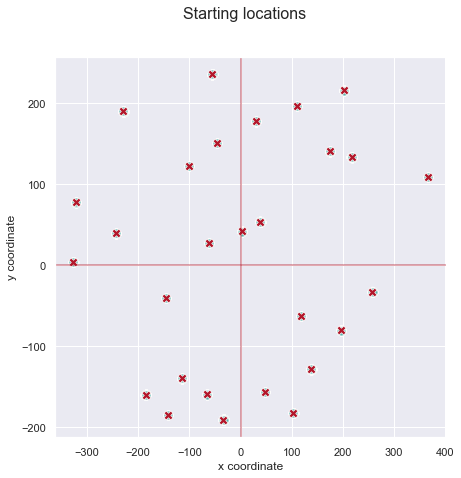

In [21]:
_, _ = plt.subplots(figsize=(7,7))

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=80
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=80,
    marker='X',
    color=colorblind_palette[1]
)

plt.suptitle(t='Starting locations', size=16)
plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)

plt.savefig(f'{PLOT_PATH}/starting_locations_original.png', bbox_inches='tight', dpi=90)

plt.show()

Find the distances of the starting locations to the center

In [22]:
X_all_locations = starting_locations[['SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']].values
kmeans = KMeans(n_clusters=1, init='k-means++', random_state=0).fit(X_all_locations)
starting_locations['location_centroid_x'], starting_locations['location_centroid_z'] = kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1]
starting_locations['distance_to_center_of_locations'] = (starting_locations[['location_centroid_x', 'location_centroid_z', 'SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']]
                                                         .apply(lambda x: distance.euclidean((x[0], x[1]), (x[2], x[3])), axis=1)
                                                         )

starting_locations.distance_to_center_of_locations.describe()

count     28.000000
mean     207.808672
std       80.602595
min       27.763098
25%      163.301037
50%      216.152134
75%      250.363904
max      381.121064
Name: distance_to_center_of_locations, dtype: float64

In [23]:
(starting_locations
    .loc[(starting_locations.distance_to_center_of_locations == min(starting_locations.distance_to_center_of_locations)) |
         (starting_locations.distance_to_center_of_locations == max(starting_locations.distance_to_center_of_locations))]
[['SpawnPointID', 'distance_to_center_of_locations']])

,SpawnPointID,distance_to_center_of_locations
17,5,27.763098
0,9,381.121064


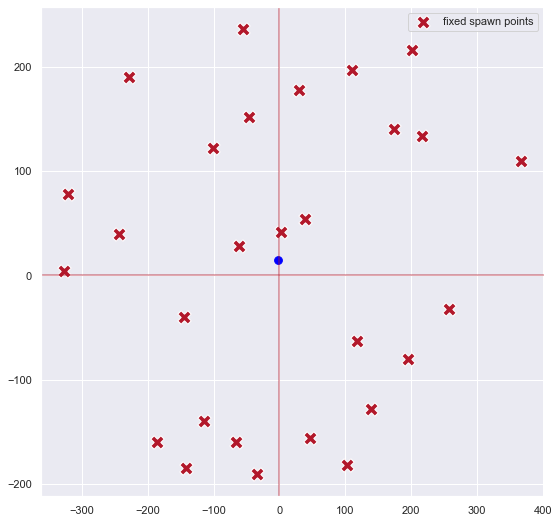

In [24]:
fig, ax = plt.subplots(figsize=(9, 9))

sns.scatterplot(
    data=X_all_locations,
    x=X_all_locations[:,0],
    y=X_all_locations[:,1],
    s=180,
    marker='X',
    color=colorblind_palette[1],
    label='fixed spawn points'
)

plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, marker='o', c='blue', label='cluster centroid')

plt.show()

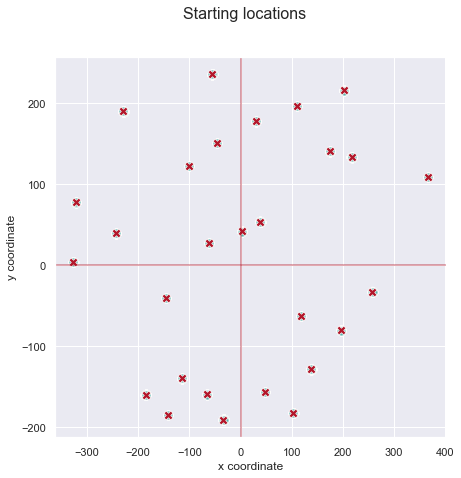

In [25]:
_, _ = plt.subplots(figsize=(7,7))

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=80
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=80,
    marker='X',
    color=colorblind_palette[1]
)

plt.suptitle(t='Starting locations', size=16)
plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)

plt.savefig(f'{PLOT_PATH}/starting_locations_original.png', bbox_inches='tight', dpi=90)

plt.show()

Fit and label the starting locations

In [26]:
X = df_cleaned[['ParticipantPosition_x', 'ParticipantPosition_z']].values
kmeans = KMeans(n_clusters=28, init='k-means++', random_state=0)
df_cleaned['starting_loc'] = kmeans.fit_predict(X) + 1
df_cleaned.starting_loc.describe()

count    7708.000000
mean       14.497794
std         8.078126
min         1.000000
25%         7.000000
50%        14.000000
75%        22.000000
max        28.000000
Name: starting_loc, dtype: float64

In [27]:
X_start = starting_locations[['SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']].values
starting_locations['starting_loc'] = kmeans.predict(X_start) + 1
starting_locations.starting_loc.describe()

count    28.000000
mean     14.500000
std       8.225975
min       1.000000
25%       7.750000
50%      14.500000
75%      21.250000
max      28.000000
Name: starting_loc, dtype: float64

Validity check for the derived starting locations (black circle should lie on the red circle)

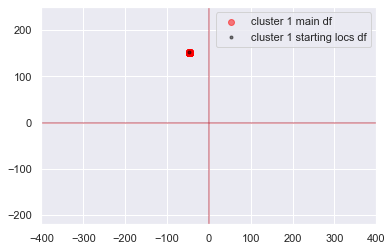

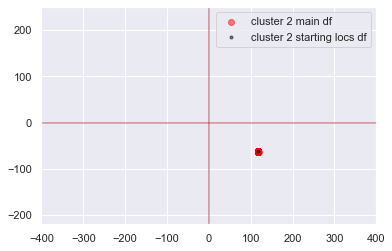

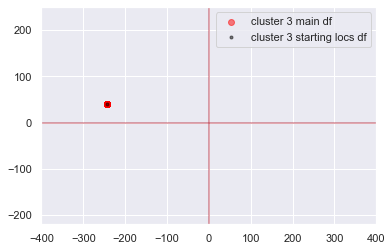

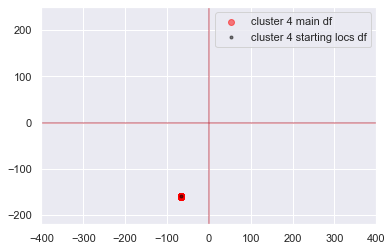

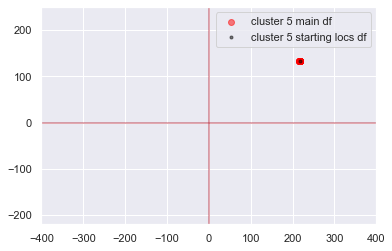

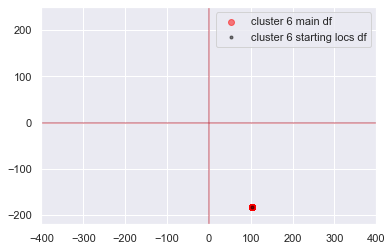

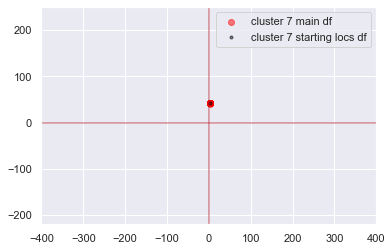

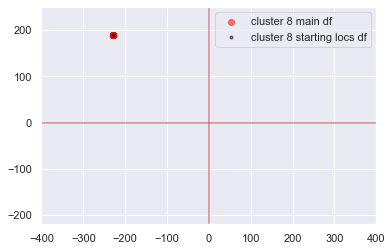

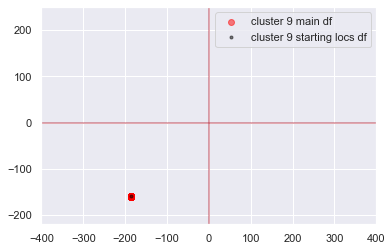

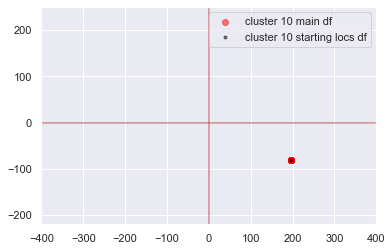

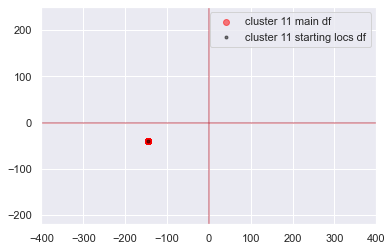

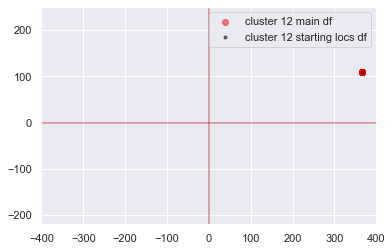

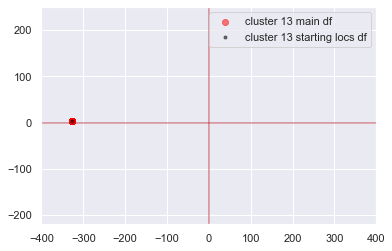

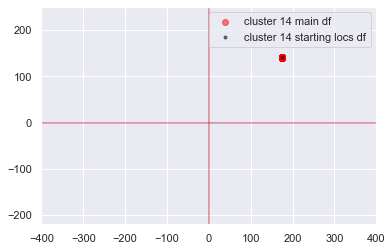

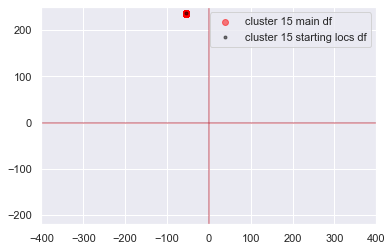

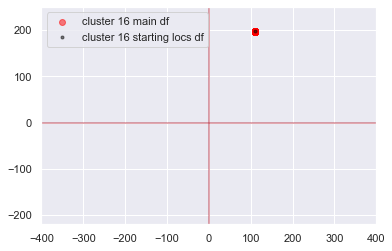

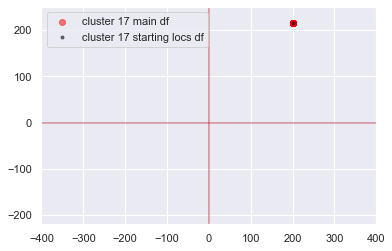

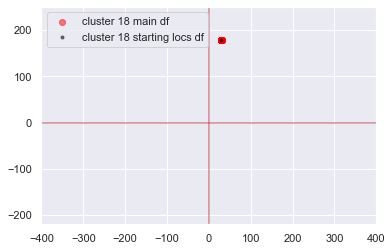

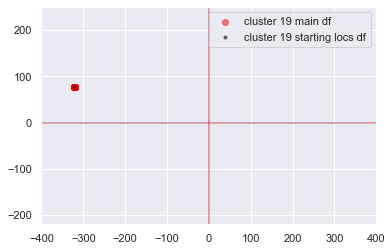

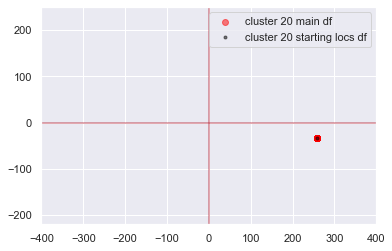

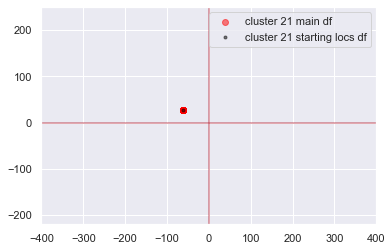

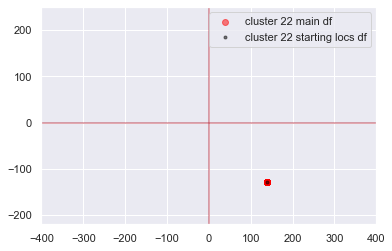

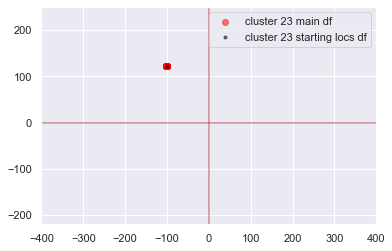

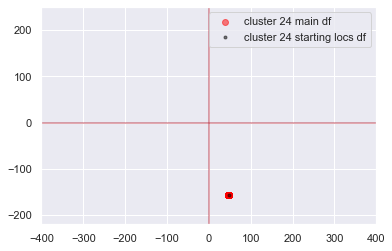

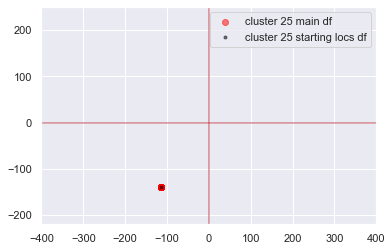

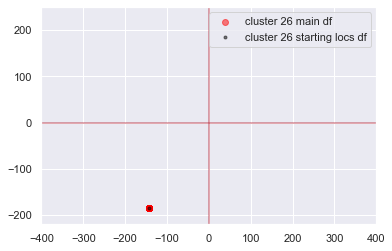

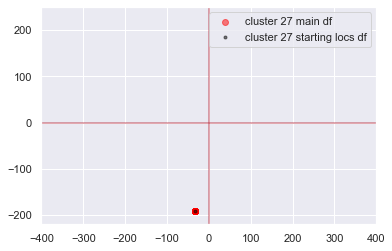

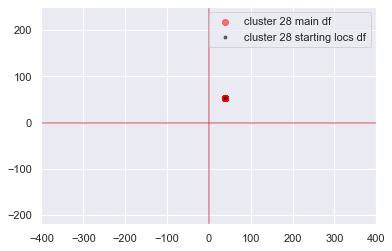

In [28]:
y_kmeans = df_cleaned.starting_loc
y_kmeans2 = starting_locations.starting_loc

for i in range(1, len(y_kmeans.unique())+1):
    fig, ax = plt.subplots()
    ax.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], label=f'cluster {i} main df', color='red', alpha=.5)
    ax.scatter(X_start[y_kmeans2==i,0], X_start[y_kmeans2==i,1], label=f'cluster {i} starting locs df', marker='.', color='black', alpha=.5)

    plt.legend()
    plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
    plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)
    plt.setp(ax, ylim=(-220, 250), xlim=(-400, 400))
    plt.show()


Add starting location data for each trial to the main dataframe

In [29]:
df_cleaned = (
    pd.merge(
        df_cleaned,
        starting_locations[['starting_loc', 'SpawnPointName', 'SpawnPointID', 'SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z', 'distance_to_center_of_locations']],
        left_on='starting_loc',
        right_on='starting_loc',
        how='left')
)

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,avatarID,...,RT,TimeOut,TimeStampBegin,TimeStampEnd,starting_loc,SpawnPointName,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.z,distance_to_center_of_locations
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,...,25.825715,False,2021-11-18 10:22:23.050529792,2021-11-18 10:22:48.876244224,25,SP_TaskBuilding_44,44,-114.325958,-139.534698,190.295371
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,...,4.799789,False,2021-11-18 10:31:54.923360256,2021-11-18 10:31:59.723149568,4,SP_TaskBuilding_36,36,-65.603775,-159.510620,185.000247
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,...,4.638590,False,2021-11-18 10:32:56.289441792,2021-11-18 10:33:00.928032000,28,SP_TaskBuilding_30,30,38.822807,53.957973,57.153837
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,...,2.361455,False,2021-11-18 10:33:26.974466304,2021-11-18 10:33:29.335921408,28,SP_TaskBuilding_30,30,38.822807,53.957973,57.153837
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,...,5.975304,False,2021-11-18 10:38:16.509860608,2021-11-18 10:38:22.485164288,16,SP_TaskBuilding_19,19,110.677322,197.029724,214.834342


Sanity checking the locations

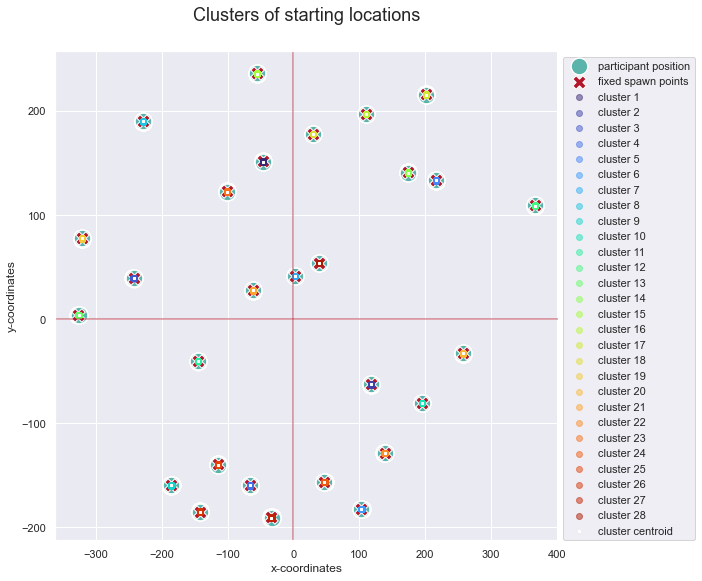

In [30]:
fig, ax = plt.subplots(figsize=(9, 9))
y_kmeans = df_cleaned.starting_loc

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=280,
    label='participant position'
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=180,
    marker='X',
    color=colorblind_palette[1],
    label='fixed spawn points'
)


for i in range(1, len(y_kmeans.unique())+1):
    ax.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], label=f'cluster {i}', color=plt.cm.turbo(i/30), alpha=.5)
ax.axvline(x=0, alpha=.5, color=colorblind_palette[1])
ax.axhline(y=0, alpha=.5, color=colorblind_palette[1])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 8, marker='s', c='white', label='cluster centroid')
ax.set_title('Clusters of starting locations', size=18, y=1.05)
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.legend(bbox_to_anchor=(1, 1))

plt.savefig(f'{PLOT_PATH}/starting_locations_kmeans.png', bbox_inches='tight', dpi=90)

plt.show()

## Calculate distance from `participant position` to the `target building` as origin

In [31]:
df_cleaned['distance_to_target'] = (df_cleaned[['ParticipantPosition_x', 'ParticipantPosition_z', 'BuildingCenterWorld_x', 'BuildingCenterWorld_z']]
                                    .apply(lambda x: distance.euclidean((x[0], x[1]), (x[2], x[3])), axis=1)
                                    )

df_cleaned.distance_to_target.describe()

count    7708.000000
mean      289.501605
std       139.738577
min        21.578343
25%       181.585388
50%       273.025892
75%       384.936761
max       738.776268
Name: distance_to_target, dtype: float64

## Calculate angle with body `(participant position)` as origin

#### Translate the ` building center ` by ` participant's position ` to make ` body position ` the origin

In [32]:
df_cleaned['moved_target_position_x'] = df_cleaned['BuildingCenterWorld_x'] - df_cleaned.ParticipantPosition_x
df_cleaned['moved_target_position_z'] = df_cleaned['BuildingCenterWorld_z'] - df_cleaned.ParticipantPosition_z

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,avatarID,...,TimeStampEnd,starting_loc,SpawnPointName,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.z,distance_to_center_of_locations,distance_to_target,moved_target_position_x,moved_target_position_z
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,...,2021-11-18 10:22:48.876244224,25,SP_TaskBuilding_44,44,-114.325958,-139.534698,190.295371,197.743621,41.750862,193.285812
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,...,2021-11-18 10:31:59.723149568,4,SP_TaskBuilding_36,36,-65.603775,-159.510620,185.000247,213.345438,-6.909050,213.233536
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,...,2021-11-18 10:33:00.928032000,28,SP_TaskBuilding_30,30,38.822807,53.957973,57.153837,111.427967,-111.427666,-0.259201
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,...,2021-11-18 10:33:29.335921408,28,SP_TaskBuilding_30,30,38.822807,53.957973,57.153837,111.458707,-111.458366,-0.275711
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,...,2021-11-18 10:38:22.485164288,16,SP_TaskBuilding_19,19,110.677322,197.029724,214.834342,232.651757,-183.332466,-143.234238


#### Calculate the `angle difference` between the `derived direction` and `derived target` points and the `x_axis`

In [33]:
df_cleaned['target_to_x_180'] = np.rad2deg(np.arctan2(df_cleaned.moved_target_position_z, df_cleaned.moved_target_position_x))
df_cleaned['dir_to_x_180'] = np.rad2deg(np.arctan2(df_cleaned.PointerDirection_z, df_cleaned.PointerDirection_x))

df_cleaned[['dir_to_x_180', 'target_to_x_180']].describe()

,dir_to_x_180,target_to_x_180
count,7708.000000,7708.000000
mean,-10.751423,-5.545029
std,105.867293,104.514810
min,-179.997813,-179.866720
25%,-108.164771,-98.793917
50%,-9.717036,-2.313330
75%,75.915669,73.690712
max,179.942005,179.878122


## Calculate angle deviation between the selected direction and the target

Convert the angular `difference from the x-axis` of `target` and `direction` to `360 degree`

In [34]:
df_cleaned['target_to_x_360'] = np.where(df_cleaned.target_to_x_180 < 0,
                                         360 + df_cleaned.target_to_x_180,
                                         df_cleaned.target_to_x_180
)

df_cleaned['dir_to_x_360'] = np.where(df_cleaned.dir_to_x_180 < 0,
                                      360 + df_cleaned.dir_to_x_180,
                                      df_cleaned.dir_to_x_180
)

df_cleaned[['target_to_x_360','dir_to_x_360']].describe()

,target_to_x_360,dir_to_x_360
count,7708.000000,7708.000000
mean,180.012833,179.103273
std,108.788003,102.898425
min,0.063520,0.084070
25%,80.382108,86.246161
50%,184.835282,187.736392
75%,269.603686,259.882530
max,359.773355,359.997160


## Calculate the `signed angular difference` between `selected direction` and the `target`

In [35]:
df_cleaned['signed_180_angles'] = (
    ((df_cleaned.target_to_x_360 - df_cleaned.dir_to_x_360) + 180) % 360 - 180
)

df_cleaned.signed_180_angles.describe()

count    7708.000000
mean        5.906966
std        65.109791
min      -179.983386
25%       -25.333990
50%         5.540527
75%        40.591635
max       179.881808
Name: signed_180_angles, dtype: float64

## Convert the `signed angular difference` between `selected direction` and the `target` to `360 degree` angles

In [36]:
df_cleaned['final_360_angles'] = np.where(
    df_cleaned.signed_180_angles < 0,
    360 + df_cleaned.signed_180_angles,
    df_cleaned.signed_180_angles
)

df_cleaned.final_360_angles.describe()

count    7708.000000
mean      162.040852
std       138.005205
min         0.012277
25%        28.099735
50%       107.690944
75%       316.507810
max       359.990139
Name: final_360_angles, dtype: float64

Round the angles

In [37]:
df_cleaned['rounded_180_angles'] = round(df_cleaned.signed_180_angles)
df_cleaned['rounded_360_angles'] = round(df_cleaned.final_360_angles)

In [38]:
df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,avatarID,...,moved_target_position_x,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,signed_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,...,41.750862,193.285812,77.811048,93.207763,77.811048,93.207763,-15.396716,344.603284,-15.0,345.0
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,...,-6.909050,213.233536,91.855810,85.818077,91.855810,85.818077,6.037733,6.037733,6.0,6.0
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,...,-111.427666,-0.259201,-179.866720,-173.521430,180.133280,186.478570,-6.345290,353.654710,-6.0,354.0
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,...,-111.458366,-0.275711,-179.858270,-176.230517,180.141730,183.769483,-3.627752,356.372248,-4.0,356.0
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,...,-183.332466,-143.234238,-142.000152,-161.115388,217.999848,198.884612,19.115237,19.115237,19.0,19.0


Add absolute 180 degree angles

In [39]:
df_cleaned['absolute_180_angles'] = np.abs(df_cleaned.signed_180_angles)
df_cleaned.absolute_180_angles.describe()

count    7708.000000
mean       48.078140
std        44.298692
min         0.009861
25%        12.864763
50%        33.697731
75%        71.548217
max       179.983386
Name: absolute_180_angles, dtype: float64

## Map task building and starting location to their names

In [40]:
name_dict_ha = dict(zip(avatar_info.AvatarID, avatar_info.PlaceName))
name_dict_sl = dict(zip(starting_locations.SpawnPointName, starting_locations.SpawnPointNameMeaningful))

df_cleaned['target_building_name'] = df_cleaned.avatarID.map(name_dict_ha)
df_cleaned['starting_loc_name'] = df_cleaned.SpawnPointName.map(name_dict_sl)

df_cleaned[['avatarID', 'target_building_name', 'SpawnPointID', 'SpawnPointName', 'starting_loc_name']].sort_values(['avatarID', 'SpawnPointID'])

,avatarID,target_building_name,SpawnPointID,SpawnPointName,starting_loc_name
165,1,S (pub),1,SP_TaskBuilding_1,R (foxes)
468,1,S (pub),1,SP_TaskBuilding_1,R (foxes)
469,1,S (pub),1,SP_TaskBuilding_1,R (foxes)
2141,1,S (pub),1,SP_TaskBuilding_1,R (foxes)
5161,1,S (pub),1,SP_TaskBuilding_1,R (foxes)
...,...,...,...,...,...
1171,56,L (silo),54,SP_TaskBuilding_54,R (tree)
2184,56,L (silo),54,SP_TaskBuilding_54,R (tree)
2872,56,L (silo),55,SP_TaskBuilding_55,R (bird)
507,56,L (silo),58,SP_BasketballCourt_58,basketball court


## Change column names to python naming convention

In [41]:
df_cleaned = df_cleaned.rename(columns = {'SubjectID'               : 'subject_id',
                                          'ParticipantPosition_x'   : 'body_pos_x',
                                          'ParticipantPosition_z'   : 'body_pos_z',
                                          'PointerPosition_x'       : 'pointer_pos_x',
                                          'PointerPosition_z'       : 'pointer_pos_z',
                                          'PointerDirection_x'      : 'pointer_dir_x',
                                          'PointerDirection_z'      : 'pointer_dir_z',
                                          'PointingTargetName'      : 'target_game_object_name',
                                          'AvatarPresence'          : 'human_agent_presence',
                                          'avatarID'                : 'human_agent',
                                          'TrialID'                 : 'trial_id',
                                          'ImageName'               : 'image_name',
                                          'TimeDelta'               : 'time_delta',
                                          'TimeOut'                 : 'time_out',
                                          'TimeStampBegin'          : 'timestamp_begin',
                                          'TimeStampEnd'            : 'timestamp_end',
                                          'BuildingID'              : 'building_id',
                                          'BuildingCenterWorld_x'   : 'building_center_x',
                                          'BuildingCenterWorld_z'   : 'building_center_z',
                                          'SpawnPointName'          : 'starting_loc_unity_name',
                                          'SpawnPointID'            : 'starting_loc_id',
                                          'SpawnPointCenterWorld.x' : 'starting_loc_x',
                                          'SpawnPointCenterWorld.z' : 'starting_loc_z',
                                          'starting_loc'            : 'kmeans_categories',
                                          'ID_for_StartingPosition' : 'trial_id_per_location'
})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7708 entries, 0 to 7707
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       7708 non-null   int64  
 1   body_pos_x                       7708 non-null   float64
 2   body_pos_z                       7708 non-null   float64
 3   pointer_pos_x                    7708 non-null   float64
 4   pointer_pos_z                    7708 non-null   float64
 5   pointer_dir_x                    7708 non-null   float64
 6   pointer_dir_z                    7708 non-null   float64
 7   building_center_z                7708 non-null   float64
 8   building_center_x                7708 non-null   float64
 9   human_agent                      7708 non-null   int64  
 10  human_agent_presence             7708 non-null   bool   
 11  meaningful                       7708 non-null   bool   
 12  trial_id            

## Add meaningfulness of the starting locations to the dataframe

In [44]:
meaningful_sl = df_cleaned.query('starting_loc_name.str.startswith("S") | starting_loc_name == "basketball court"').starting_loc_name.unique()

df_cleaned['starting_loc_meaningful'] = df_cleaned.starting_loc_name.apply(lambda x: True if x in meaningful_sl else False)
df_cleaned['starting_loc_meaningful_cat'] = np.where(
    df_cleaned.starting_loc_meaningful,
    'meaningful',
    'non-meaningful'
)

df_cleaned.head()

,subject_id,body_pos_x,body_pos_z,pointer_pos_x,pointer_pos_z,pointer_dir_x,pointer_dir_z,building_center_z,building_center_x,human_agent,...,dir_to_x_360,signed_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles,absolute_180_angles,target_building_name,starting_loc_name,starting_loc_meaningful,starting_loc_meaningful_cat
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,...,93.207763,-15.396716,344.603284,-15.0,345.0,15.396716,R (underwater),S (tool shop),True,meaningful
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,...,85.818077,6.037733,6.037733,6.0,6.0,6.037733,R (underwater),R (motorbike),False,non-meaningful
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,...,186.478570,-6.345290,353.654710,-6.0,354.0,6.345290,R (underwater),R (purpul bat),False,non-meaningful
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,...,183.769483,-3.627752,356.372248,-4.0,356.0,3.627752,R (underwater),R (purpul bat),False,non-meaningful
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,...,198.884612,19.115237,19.115237,19.0,19.0,19.115237,R (underwater),R (bottle spray),False,non-meaningful


## Write the dataframe to the disk

In [46]:
df_cleaned.to_csv(f'{FILE_PATH}/07_preprocessed.csv', index=False)

print('Done!')

Done!
